#### Target Data
df1 = kid_score  

df2 = ppvt

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('./datasets/kid_iq.csv')
df2 = pd.read_csv('./datasets/child_iq.csv')
display(df1)
display(df2)

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27
...,...,...,...,...,...,...
429,430,94,0,84.877412,4,21
430,431,76,1,92.990392,4,23
431,432,50,0,94.859708,2,24
432,433,88,1,96.856624,2,21


,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26
...,...,...,...,...
395,396,87,3,21
396,397,69,2,20
397,398,80,1,25
398,399,98,1,18


In [2]:
df1 = df1.drop(labels=['Unnamed: 0'], axis=1)
df2 = df2.drop(labels=['Unnamed: 0'], axis=1)

In [3]:
df1.isna().sum()

kid_score    0
mom_hs       0
mom_iq       0
mom_work     0
mom_age      0
dtype: int64

In [4]:
df2.isna().sum()

ppvt        0
educ_cat    0
momage      0
dtype: int64

In [5]:
if df1.duplicated().values.any() :
    print('중복된 데이터가 존재합니다.')
else :
    print('중복된 데이터가 없습니다.')

중복된 데이터가 존재합니다.


In [6]:
if df2.duplicated().values.any() :
    print('중복된 데이터가 존재합니다.')
else :
    print('중복된 데이터가 없습니다.')

중복된 데이터가 존재합니다.


In [7]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
display(df1)
display(df2)

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
428,94,0,84.877412,4,21
429,76,1,92.990392,4,23
430,50,0,94.859708,2,24
431,88,1,96.856624,2,21


,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26
...,...,...,...
345,100,2,24
346,93,4,27
347,107,2,25
348,80,1,25


In [8]:
from statsmodels.api import OLS
model = OLS.from_formula("ppvt ~ momage",data=df2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ppvt   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.452
Date:                Tue, 30 Apr 2024   Prob (F-statistic):             0.0356
Time:                        11:14:41   Log-Likelihood:                -1561.6
No. Observations:                 350   AIC:                             3127.
Df Residuals:                     348   BIC:                             3135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.7062      9.378      7.113      0.000      48.262      85.150
momage         0.8615      0.408      2.110      0.036       0.059       1.665
==============================================================================
Omnibus:                        9.632   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.990
Skew:                          -0.398   Prob(JB):                      0.00677
Kurtosis:                       2.776   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from statsmodels.api import OLS
model = OLS.from_formula("kid_score ~ mom_age",data=df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.673
Date:                Tue, 30 Apr 2024   Prob (F-statistic):             0.0560
Time:                        11:14:42   Log-Likelihood:                -1918.2
No. Observations:                 433   AIC:                             3840.
Df Residuals:                     431   BIC:                             3848.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.9440      8.309      8.538      0.000      54.612      87.276
mom_age        0.6940      0.362      1.916      0.056      -0.018       1.406
==============================================================================
Omnibus:                       14.567   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.540
Skew:                          -0.459   Prob(JB):                     0.000422
Kurtosis:                       2.869   Cond. No.                         195.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features, targets = df2.iloc[:,1:] , df2.iloc[: , 0]

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [11]:
get_vif(features)

,vif_score,feature
0,8.266981,educ_cat
1,8.266981,momage


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features, targets = df1.iloc[:,1:] , df1.iloc[: , 0]

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [13]:
get_vif(features)

,vif_score,feature
0,5.361775,mom_hs
1,33.146867,mom_iq
2,7.480551,mom_work
3,33.510843,mom_age


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

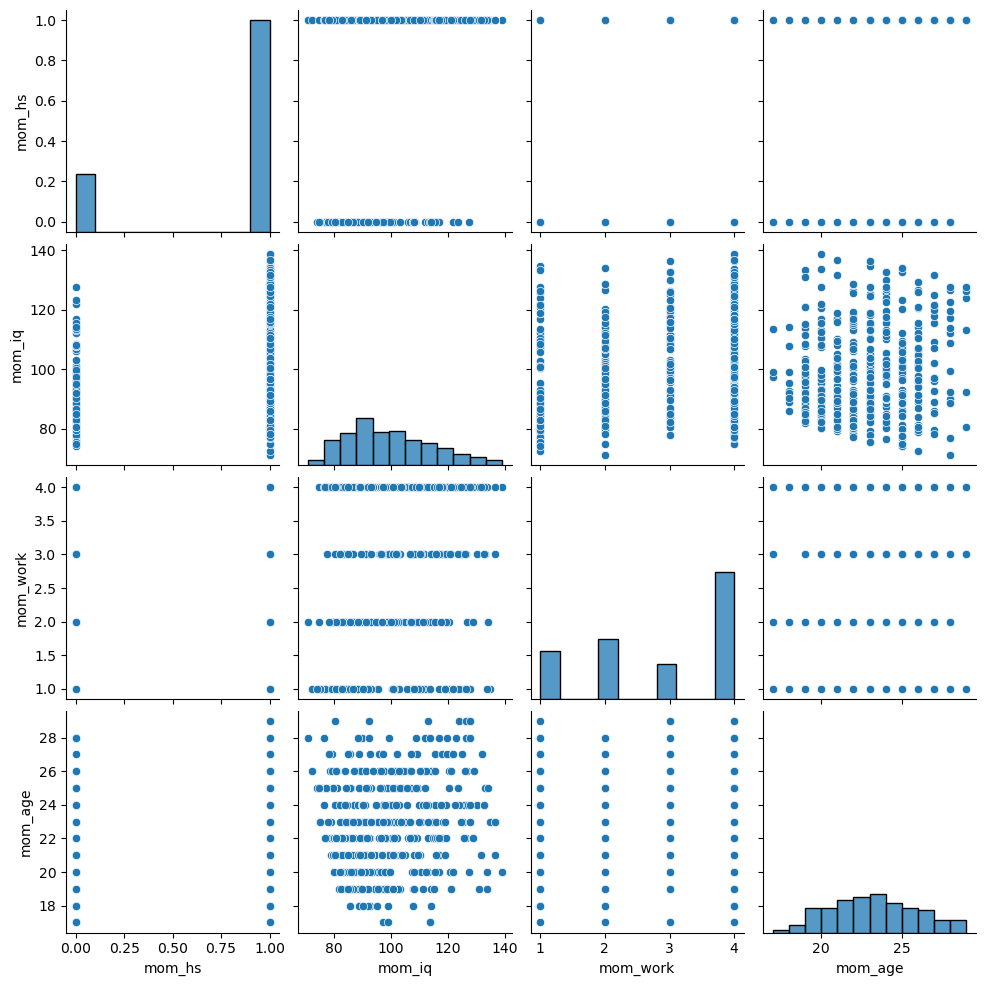

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['mom_hs' , 'mom_iq', 'mom_work', 'mom_age']

sns.pairplot(df1[columns])
plt.show()

In [26]:
# df1 = df1.drop(labels=['mom_iq' , 'mom_age'], axis=1)
df1 = df1.drop(labels=['mom_age'], axis=1)

In [30]:
get_vif(features)

,vif_score,feature
0,5.330371,mom_hs
1,8.963928,mom_iq
2,7.030963,mom_work


In [31]:
df1

,kid_score,mom_hs,mom_iq,mom_work
0,65,1,121.117529,4
1,98,1,89.361882,4
2,85,1,115.443165,4
3,83,1,99.449639,3
4,115,1,92.745710,4
...,...,...,...,...
428,94,0,84.877412,4
429,76,1,92.990392,4
430,50,0,94.859708,2
431,88,1,96.856624,2


In [18]:
from statsmodels.api import OLS
model = OLS.from_formula("kid_score ~ mom_work",data=df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.201
Date:                Tue, 30 Apr 2024   Prob (F-statistic):             0.0743
Time:                        11:14:44   Log-Likelihood:                -1918.4
No. Observations:                 433   AIC:                             3841.
Df Residuals:                     431   BIC:                             3849.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.4640      2.592     31.819      0.000      77.370      87.558
mom_work       1.4837      0.829      1.789      0.074      -0.146       3.114
==============================================================================
Omnibus:                       13.706   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.501
Skew:                          -0.439   Prob(JB):                     0.000710
Kurtosis:                       2.817   Cond. No.                         9.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ✏️ **아이 IQ와 부모와의 상관관계 (DataFrame1 분석)**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = df1.iloc[:,1:], df1.iloc[:,0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [34]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 338.2851, RMSE: 18.3925, MSLE: 0.0701, RMSLE: 0.2648, R2: 0.2842


In [35]:
df1

,kid_score,mom_hs,mom_iq,mom_work
0,65,1,121.117529,4
1,98,1,89.361882,4
2,85,1,115.443165,4
3,83,1,99.449639,3
4,115,1,92.745710,4
...,...,...,...,...
428,94,0,84.877412,4
429,76,1,92.990392,4
430,50,0,94.859708,2
431,88,1,96.856624,2


In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [37]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 322.5612, RMSE: 17.9600, MSLE: 0.0669, RMSLE: 0.2587, R2: 0.3175


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression


features, targets = df1.iloc[:,1:], df1.iloc[:,0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=100)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 609.4195, RMSE: 24.6864, MSLE: 0.1222, RMSLE: 0.3495, R2: -0.2895
RandomForestRegressor
MSE: 383.7435, RMSE: 19.5894, MSLE: 0.0754, RMSLE: 0.2746, R2: 0.1880
GradientBoostingRegressor
MSE: 363.9537, RMSE: 19.0776, MSLE: 0.0717, RMSLE: 0.2678, R2: 0.2299
XGBRegressor
MSE: 465.4197, RMSE: 21.5736, MSLE: 0.0831, RMSLE: 0.2884, R2: 0.0152
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 3
[LightGBM] [Info] Start training from score 86.332370
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = df1.iloc[:, 1:], df1.iloc[:, 0]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [1,2,3], 'min_samples_split': [5,6,7], 'n_estimators': [10, 50, 100, 500, 1000]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=RandomForestRegressor(random_state=124),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [5, 6, 7],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='r2')

In [43]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 5, 'n_es...",0.099726,37
1,"{'max_depth': 1, 'min_samples_split': 5, 'n_es...",0.109531,16
2,"{'max_depth': 1, 'min_samples_split': 5, 'n_es...",0.106739,22
3,"{'max_depth': 1, 'min_samples_split': 5, 'n_es...",0.106270,25
4,"{'max_depth': 1, 'min_samples_split': 5, 'n_es...",0.105781,28
5,"{'max_depth': 1, 'min_samples_split': 6, 'n_es...",0.099726,37
6,"{'max_depth': 1, 'min_samples_split': 6, 'n_es...",0.109531,16
7,"{'max_depth': 1, 'min_samples_split': 6, 'n_es...",0.106739,22
8,"{'max_depth': 1, 'min_samples_split': 6, 'n_es...",0.106270,25
9,"{'max_depth': 1, 'min_samples_split': 6, 'n_es...",0.105781,28


### 💡 **아이 IQ와 부모와의 상관관계 (DataFrame1 결과)**
- 회귀 분석 결과 기존 OLS에서 0.007 이라는 R<sub>2</sub> 결과값이 나왔다.
- 다항식(PolynomialFeatures)으로 분석결과에서는 R<sub>2</sub>값이 0.3175로 더 높게 나왔으며, 나머지 회귀 모델들중에서도 가장 높은 수치를 기록하였으며, MSE , RMSE 값은 각각 MSE: 322.5612, RMSE: 17.9600 값이 나왔다.

### ✏️ **아이 IQ와 부모와의 상관관계 (DataFrame2 분석)**

In [47]:
df2

,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26
...,...,...,...
345,100,2,24
346,93,4,27
347,107,2,25
348,80,1,25


array([[<Axes: title={'center': 'ppvt'}>,
        <Axes: title={'center': 'educ_cat'}>],
       [<Axes: title={'center': 'momage'}>, <Axes: >]], dtype=object)

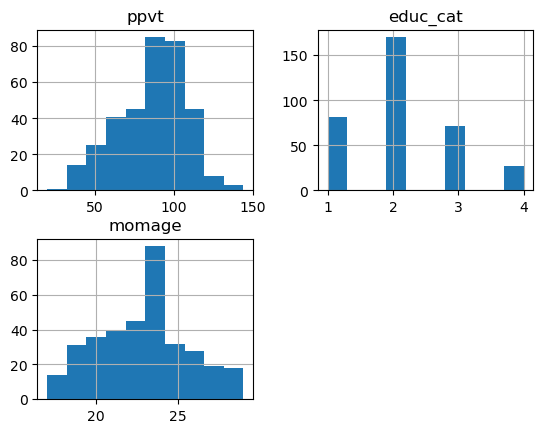

In [48]:
df2.hist()

In [57]:
p_df = df2.copy()
p_df

,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26
...,...,...,...
345,100,2,24
346,93,4,27
347,107,2,25
348,80,1,25


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features, targets = p_df.iloc[:,1:] , p_df.iloc[: , 0]

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [59]:
get_vif(features)

,vif_score,feature
0,8.266981,educ_cat
1,8.266981,momage


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


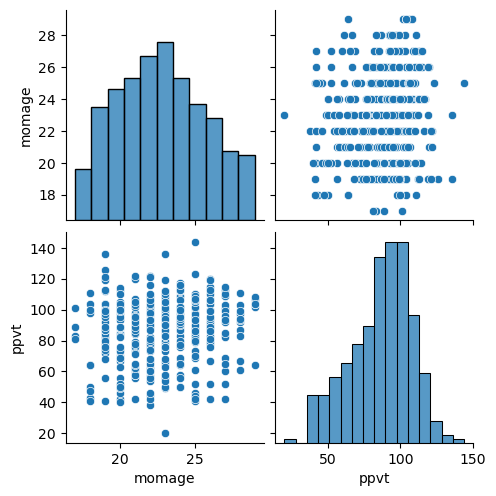

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['momage' , 'ppvt']

sns.pairplot(p_df[columns])
plt.show()

In [72]:
p_df = p_df.drop(labels=['educ_cat'], axis=1)

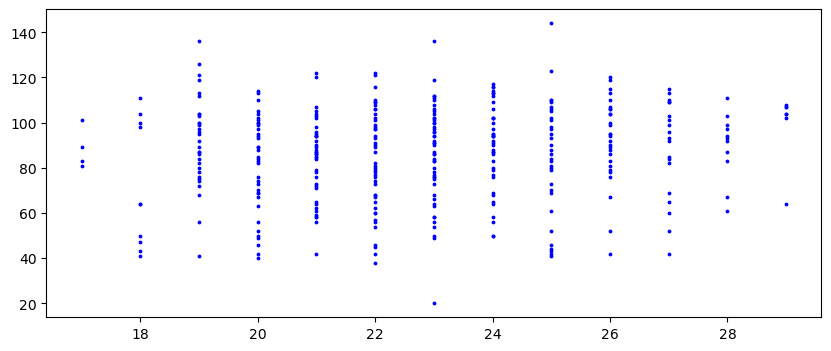

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(10, 4))

plt.scatter(x='momage', y='ppvt', data=p_df, c='blue', s=3)
plt.show()

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features , targets = p_df.iloc[:,1:] , p_df.iloc[: ,0]

X_train, X_test ,y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

print('W:{:.4f}, b:{:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W:0.6598, b:71.4346


In [76]:
from sklearn.metrics import mean_squared_error, r2_score

prediction = l_r.predict(X_test)
print('loss : {:.4f}, RMSE_loss : {:.4f} , R2 : {:.4f}'.format(mean_squared_error(y_test, prediction), 
                                                np.sqrt(mean_squared_error(y_test, prediction)),
                                                r2_score(y_test, prediction)))

loss : 424.6855, RMSE_loss : 20.6079 , R2 : 0.0305


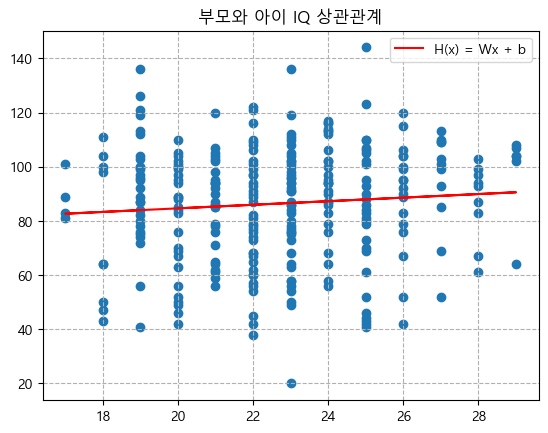

In [80]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.6598 * X_train + 71.4346, color="red", label='H(x) = Wx + b')
plt.grid(visible=True, linestyle='--')
plt.legend()
plt.title('부모와 아이 IQ 상관관계')
plt.show()